In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os

-0.05063374459999999 1.0207815999999994


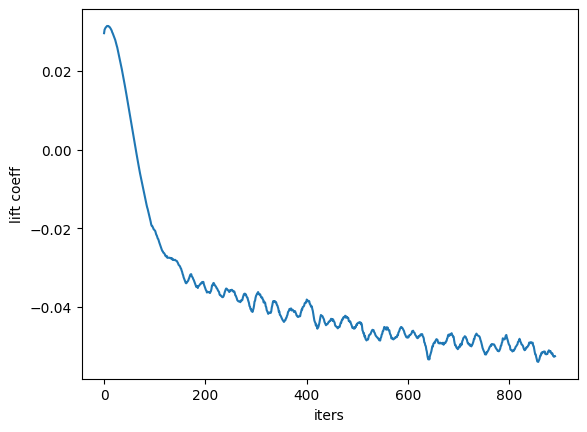

In [14]:
coeffs = np.loadtxt("../aoasweep/GRTsteady4Mesh8/"+
                   "postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9, delimiter="\t")
coeff = np.mean(coeffs[-100:], axis=0)
plt.plot(coeffs[10:,2])
plt.xlabel("iters")
plt.ylabel("lift coeff")
#plt.axhline(y=coeff[3], c='r')
print(coeff[2], coeff[3])

In [25]:
def plot_coeffs(sweepdir):
    
    cwd = os.getcwd()
    files = os.listdir(sweepdir)
    #coefficients = np.zeros((len(files),3))
    sizes = np.zeros(len(files))
    for i,file in enumerate(sorted(files)): 
        os.chdir(os.path.join(sweepdir, file))
        with open("mesh.log") as file: 
            lines = file.readlines()
            #coefficients[i,0] = float(lines[30][10:])
            sizes[i] = float(lines[30][10:])
            file.close()
        #coefs = np.loadtxt("postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9 , delimiter="\t")
        #coefficients[i,1:] = np.mean(coefs[-100:,2:4], axis=0)
        os.chdir(cwd)
    return sorted(files),sizes,# coefficients

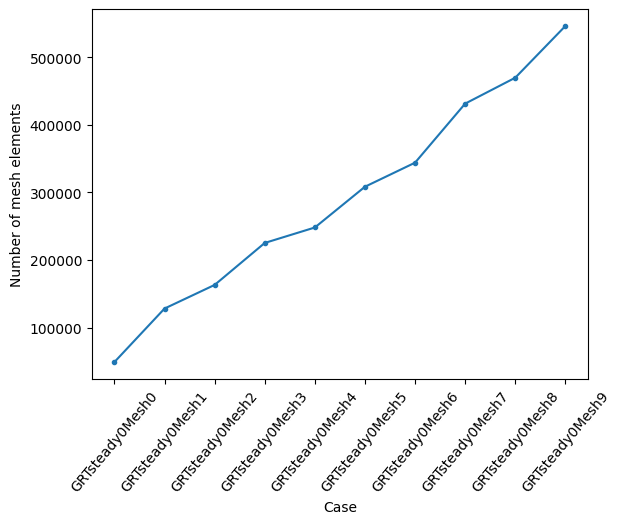

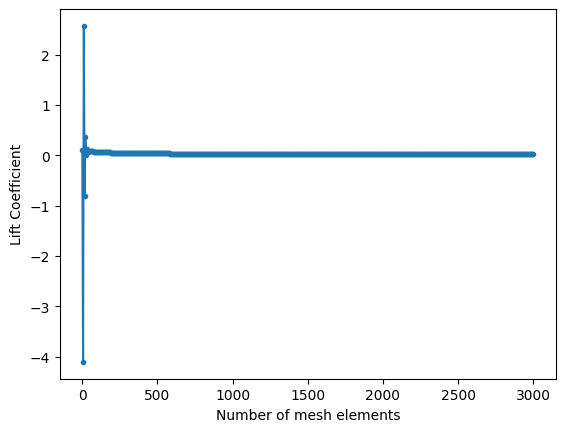

In [76]:
files, sizes = plot_coeffs("../meshsweep")
plt.plot(sizes[sizes.argsort()], marker=".")
plt.xlabel("Case")
plt.ylabel("Number of mesh elements")
plt.xticks(range(0,len(files)), np.array(files)[sizes.argsort()], rotation=50)
plt.show()
coeffs = coeffs[coeffs[:,0].argsort()]
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(coeffs[:,0], coeffs[:,2],marker=".")
#ax2.plot(coeffs[:,0], coeffs[:,1], marker=".", c="red")
ax.set_xlabel("Number of mesh elements")
ax.set_ylabel("Lift Coefficient")
#ax2.set_ylabel("Drag Coefficient")
plt.show()